<a href="https://colab.research.google.com/github/AMP4323/BTP/blob/main/Log_Returns.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import time
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import numpy as np

In [10]:
url = 'https://raw.githubusercontent.com/AMP4323/BTP/main/Bitcoin%20Historical%20Data%20-%20Investing.com%20India%20(1).csv'

df = pd.read_csv(url, header=None, names=['Date',	'Price',	'Open',	'High',	'Low',	'Volume',	'ChangePercentage'])
df =df.drop(0)
df

,Date,Price,Open,High,Low,Volume,ChangePercentage
1,"Apr 18, 2021","54,791.6","60,043.2","60,362.1","51,817.6",185.01K,-8.74%
2,"Apr 17, 2021","60,041.9","61,358.3","62,509.1","59,672.1",84.08K,-2.18%
3,"Apr 16, 2021","61,379.7","63,211.6","63,518.5","60,027.3",136.85K,-2.90%
4,"Apr 15, 2021","63,216.0","62,978.6","63,729.1","62,067.5",76.97K,0.37%
5,"Apr 14, 2021","62,980.4","63,544.2","64,778.0","61,366.3",130.43K,-0.88%
...,...,...,...,...,...,...,...
1931,"Jan 05, 2016",431.2,433.3,435.3,428.9,45.03K,-0.49%
1932,"Jan 04, 2016",433.3,430.7,435.3,428.6,53.01K,0.61%
1933,"Jan 03, 2016",430.7,433.7,434.1,423.1,54.83K,-0.70%
1934,"Jan 02, 2016",433.7,434.0,437.4,430.7,33.57K,-0.06%


In [11]:
df['Price'] = df['Price'].str.replace(',', '')
df['Price'] = df['Price'].astype('float64')
df['Open'] = df['Open'].str.replace(',', '')
df['Open'] = df['Open'].astype('float64')
df['High'] = df['High'].str.replace(',', '')
df['High'] = df['High'].astype('float64')
df['Low'] = df['Low'].str.replace(',', '')
df['Low'] = df['Low'].astype('float64')
df

,Date,Price,Open,High,Low,Volume,ChangePercentage
1,"Apr 18, 2021",54791.6,60043.2,60362.1,51817.6,185.01K,-8.74%
2,"Apr 17, 2021",60041.9,61358.3,62509.1,59672.1,84.08K,-2.18%
3,"Apr 16, 2021",61379.7,63211.6,63518.5,60027.3,136.85K,-2.90%
4,"Apr 15, 2021",63216.0,62978.6,63729.1,62067.5,76.97K,0.37%
5,"Apr 14, 2021",62980.4,63544.2,64778.0,61366.3,130.43K,-0.88%
...,...,...,...,...,...,...,...
1931,"Jan 05, 2016",431.2,433.3,435.3,428.9,45.03K,-0.49%
1932,"Jan 04, 2016",433.3,430.7,435.3,428.6,53.01K,0.61%
1933,"Jan 03, 2016",430.7,433.7,434.1,423.1,54.83K,-0.70%
1934,"Jan 02, 2016",433.7,434.0,437.4,430.7,33.57K,-0.06%


In [12]:
df = df.assign(Date=pd.to_datetime(df['Date']))
df

,Date,Price,Open,High,Low,Volume,ChangePercentage
1,2021-04-18,54791.6,60043.2,60362.1,51817.6,185.01K,-8.74%
2,2021-04-17,60041.9,61358.3,62509.1,59672.1,84.08K,-2.18%
3,2021-04-16,61379.7,63211.6,63518.5,60027.3,136.85K,-2.90%
4,2021-04-15,63216.0,62978.6,63729.1,62067.5,76.97K,0.37%
5,2021-04-14,62980.4,63544.2,64778.0,61366.3,130.43K,-0.88%
...,...,...,...,...,...,...,...
1931,2016-01-05,431.2,433.3,435.3,428.9,45.03K,-0.49%
1932,2016-01-04,433.3,430.7,435.3,428.6,53.01K,0.61%
1933,2016-01-03,430.7,433.7,434.1,423.1,54.83K,-0.70%
1934,2016-01-02,433.7,434.0,437.4,430.7,33.57K,-0.06%


In [19]:
df = df.drop(columns=["Open", "High", "Low", "Volume", "ChangePercentage"])

In [22]:
df

,Date,Price
1,2021-04-18,54791.6
2,2021-04-17,60041.9
3,2021-04-16,61379.7
4,2021-04-15,63216.0
5,2021-04-14,62980.4
...,...,...
1931,2016-01-05,431.2
1932,2016-01-04,433.3
1933,2016-01-03,430.7
1934,2016-01-02,433.7


In [23]:
df =  df.set_index(['Date'])

In [24]:
df


,Price
Date,
2021-04-18,54791.6
2021-04-17,60041.9
2021-04-16,61379.7
2021-04-15,63216.0
2021-04-14,62980.4
...,...
2016-01-05,431.2
2016-01-04,433.3
2016-01-03,430.7


In [25]:
import numpy as np
# shift moves dates back by 1
df_change = df.apply(lambda x: np.log(x) - np.log(x.shift(1)))
df_change.head()

,Price
Date,
2021-04-18,NaN
2021-04-17,0.091506
2021-04-16,0.022037
2021-04-15,0.029478
2021-04-14,-0.003734


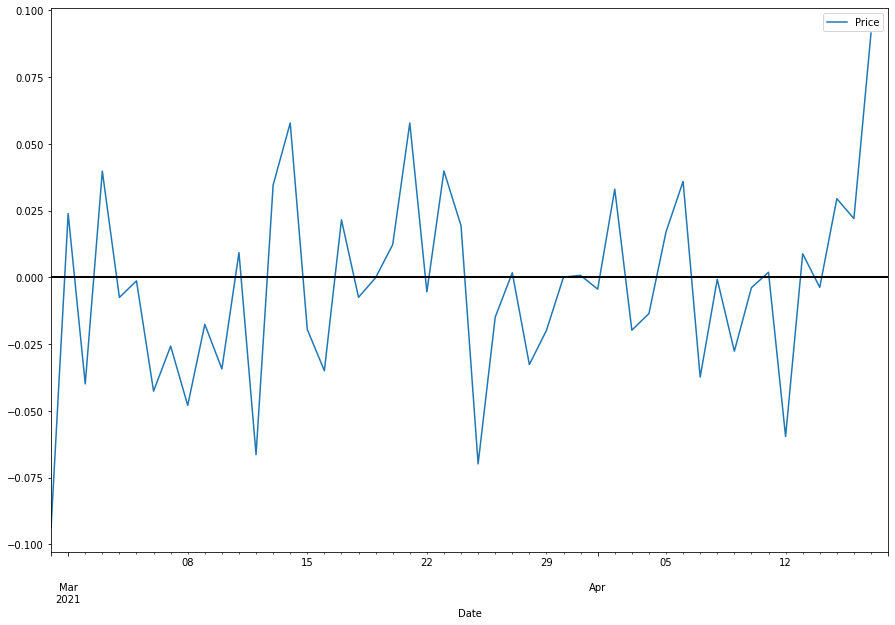

In [26]:
df_change[:50].plot(figsize=(15, 10)).axhline(color='black', linewidth=2)

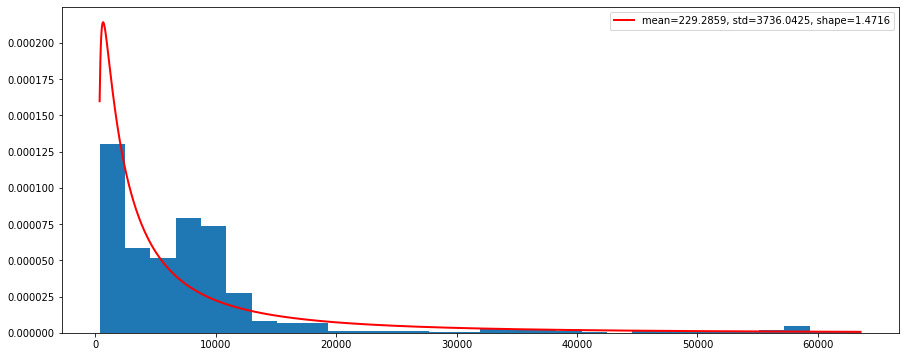

In [33]:
from scipy import stats
from scipy.stats import lognorm
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15, 6))
values = df['Price']
shape, loc, scale = stats.lognorm.fit(values) 
x = np.linspace(values.min(), values.max(), len(values))
pdf = stats.lognorm.pdf(x, shape, loc=loc, scale=scale) 
label = 'mean=%.4f, std=%.4f, shape=%.4f' % (loc, scale, shape)
ax.hist(values, bins=30, density=True)
ax.plot(x, pdf, 'r-', lw=2, label=label)
ax.legend(loc='best')

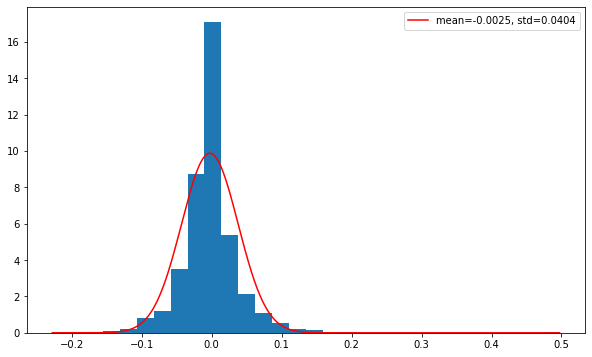

In [34]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

values = df_change['Price'][1:]  # skip first NA value
x = np.linspace(values.min(), values.max(), len(values))
loc, scale = stats.norm.fit(values)
param_density = stats.norm.pdf(x, loc=loc, scale=scale)
label = 'mean=%.4f, std=%.4f' % (loc, scale)
fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(values, bins=30, density=True)
ax.plot(x, param_density, 'r-', label=label)
ax.legend(loc='best')